In [1]:
# import some important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from IPython.display import Image
import time
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Markdown

In [2]:
start_time=time.time()
start_time

1712120899.5900223

In [3]:
warnings.simplefilter("ignore", category=FutureWarning)
pd.set_option("display.max_rows", 10)
seed = 25
tunning = True
tunning

True

# Data preparation

### 1.1 Data Access

In [4]:
data_train_full=pd.read_csv(r"C:\Users\Shashi Shekhar\Downloads\train\train.csv", index_col="Id")
data_train_full

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180945,38,9.0,33.0,19.5,25.5,36.5,33.0,20.5,28.0,36.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
1180945,42,9.0,33.0,21.0,30.5,37.0,36.5,22.0,33.5,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
1180945,47,9.0,29.5,10.0,26.0,30.5,31.0,16.5,26.0,33.0,...,1.051667,1.75,NaN,0.750,3.0000,13.379990,NaN,NaN,13.379990,8.636004


#### 1.2 Data Exploration

In [5]:
data_train_full.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254


#### 1.3 Feature Engineering

In [6]:
#dataset by grouping of column Id
data_train=data_train_full.groupby("Id").mean()
data_train

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,29.833333,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,29.083333,2.0,16.625000,13.666667,17.375000,21.333333,22.666667,20.375000,22.916667,25.916667,...,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
3,30.750000,10.0,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,8.500000,...,0.801667,NaN,NaN,NaN,2.062500,NaN,NaN,NaN,NaN,26.162014
4,28.153846,9.0,26.600000,20.071429,25.800000,30.269231,26.666667,21.090909,25.115385,32.230769,...,1.015833,-1.125000,NaN,0.500000,1.515625,7.029999,NaN,0.000000,6.329994,4.064002
5,28.714286,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180941,31.166667,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1728.978900
1180942,28.461538,9.0,15.666667,13.000000,15.888889,19.950000,17.333333,14.000000,15.900000,19.772727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.524001
1180943,26.500000,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000


In [7]:
#reset index
data_train.reset_index(inplace=True)
data_train

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,29.833333,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,2,29.083333,2.0,16.625000,13.666667,17.375000,21.333333,22.666667,20.375000,22.916667,...,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
2,3,30.750000,10.0,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,...,0.801667,NaN,NaN,NaN,2.062500,NaN,NaN,NaN,NaN,26.162014
3,4,28.153846,9.0,26.600000,20.071429,25.800000,30.269231,26.666667,21.090909,25.115385,...,1.015833,-1.125000,NaN,0.500000,1.515625,7.029999,NaN,0.000000,6.329994,4.064002
4,5,28.714286,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180940,1180941,31.166667,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1728.978900
1180941,1180942,28.461538,9.0,15.666667,13.000000,15.888889,19.950000,17.333333,14.000000,15.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.524001
1180942,1180943,26.500000,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1180943,1180944,30.764706,11.0,26.666667,24.375000,29.083333,33.906250,29.166667,26.000000,28.071429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.556002


In [8]:
data_train.columns

Index(['Id', 'minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th',
       'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th', 'Expected'],
      dtype='object')

In [9]:
data_train["Expected"].describe()

count    1.180945e+06
mean     1.322453e+02
std      6.030804e+02
min      1.000000e-02
25%      2.540001e-01
50%      1.016001e+00
75%      3.810002e+00
max      3.301773e+04
Name: Expected, dtype: float64

In [10]:
data_train.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,29.833333,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,2,29.083333,2.0,16.625,13.666667,17.375,21.333333,22.666667,20.375000,22.916667,...,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
2,3,30.750000,10.0,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,...,0.801667,NaN,NaN,NaN,2.062500,NaN,NaN,NaN,NaN,26.162014
3,4,28.153846,9.0,26.600,20.071429,25.800,30.269231,26.666667,21.090909,25.115385,...,1.015833,-1.125000,NaN,0.500000,1.515625,7.029999,NaN,0.000000,6.329994,4.064002
4,5,28.714286,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700440


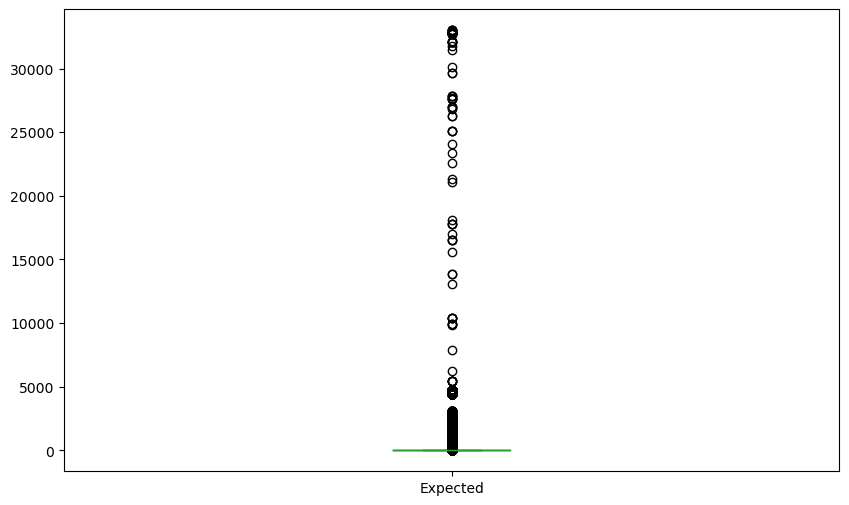

In [11]:
plt.figure(figsize=(10,6))
data_train["Expected"].plot(kind="box")
plt.show()

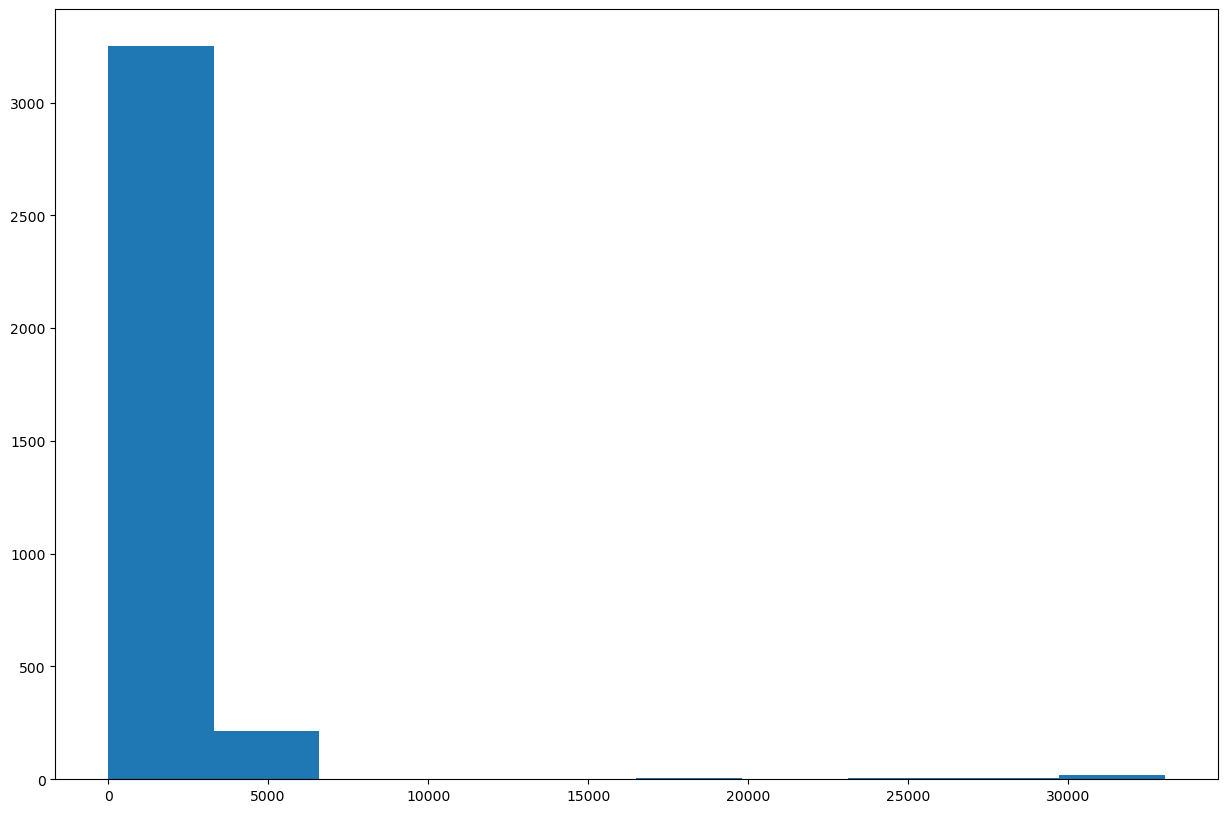

In [12]:
plt.figure(figsize=(15,10))
plt.hist(data_train["Expected"].unique())
plt.show()

##### Imputation

In [13]:
data_train.fillna(0, inplace=True)
data_train

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,29.833333,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
1,2,29.083333,2.0,16.625000,13.666667,17.375000,21.333333,22.666667,20.375000,22.916667,...,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
2,3,30.750000,10.0,0.000000,0.000000,0.000000,8.500000,0.000000,0.000000,0.000000,...,0.801667,0.000000,0.000000,0.000000,2.062500,0.000000,0.000000,0.000000,0.000000,26.162014
3,4,28.153846,9.0,26.600000,20.071429,25.800000,30.269231,26.666667,21.090909,25.115385,...,1.015833,-1.125000,0.000000,0.500000,1.515625,7.029999,0.000000,0.000000,6.329994,4.064002
4,5,28.714286,13.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,774.700440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180940,1180941,31.166667,15.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1728.978900
1180941,1180942,28.461538,9.0,15.666667,13.000000,15.888889,19.950000,17.333333,14.000000,15.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.524001
1180942,1180943,26.500000,14.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
1180943,1180944,30.764706,11.0,26.666667,24.375000,29.083333,33.906250,29.166667,26.000000,28.071429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.556002


In [14]:
data_train["Expected"].describe()

count    1.180945e+06
mean     1.322453e+02
std      6.030804e+02
min      1.000000e-02
25%      2.540001e-01
50%      1.016001e+00
75%      3.810002e+00
max      3.301773e+04
Name: Expected, dtype: float64

##### Data Cleansing

In [15]:
q1=data_train["Expected"].quantile(0.05)
q1

0.25400013

In [16]:
q3=data_train["Expected"].quantile(0.75)
q3

3.810002

In [17]:
iqr=q3-q1
iqr

3.55600187

In [18]:
lower_bound=q1-1.5*iqr
lower_bound

-5.080002675

In [19]:
upper_bound=q3+1.5*iqr
upper_bound

9.144004805

In [20]:
data_train_limited=data_train[(data_train["Expected"]>=lower_bound) & (data_train["Expected"]<=upper_bound)].copy()
data_train_limited

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,29.833333,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
1,2,29.083333,2.0,16.625000,13.666667,17.375000,21.333333,22.666667,20.375000,22.916667,...,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
3,4,28.153846,9.0,26.600000,20.071429,25.800000,30.269231,26.666667,21.090909,25.115385,...,1.015833,-1.125000,0.000000,0.500000,1.515625,7.029999,0.000000,0.000000,6.329994,4.064002
5,6,29.833333,13.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
6,7,30.933333,13.0,14.750000,10.500000,12.500000,14.428571,14.750000,11.500000,14.875000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180937,1180938,28.363636,10.0,19.000000,0.000000,19.000000,19.166667,23.000000,14.000000,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508000
1180941,1180942,28.461538,9.0,15.666667,13.000000,15.888889,19.950000,17.333333,14.000000,15.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.524001
1180942,1180943,26.500000,14.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
1180943,1180944,30.764706,11.0,26.666667,24.375000,29.083333,33.906250,29.166667,26.000000,28.071429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.556002


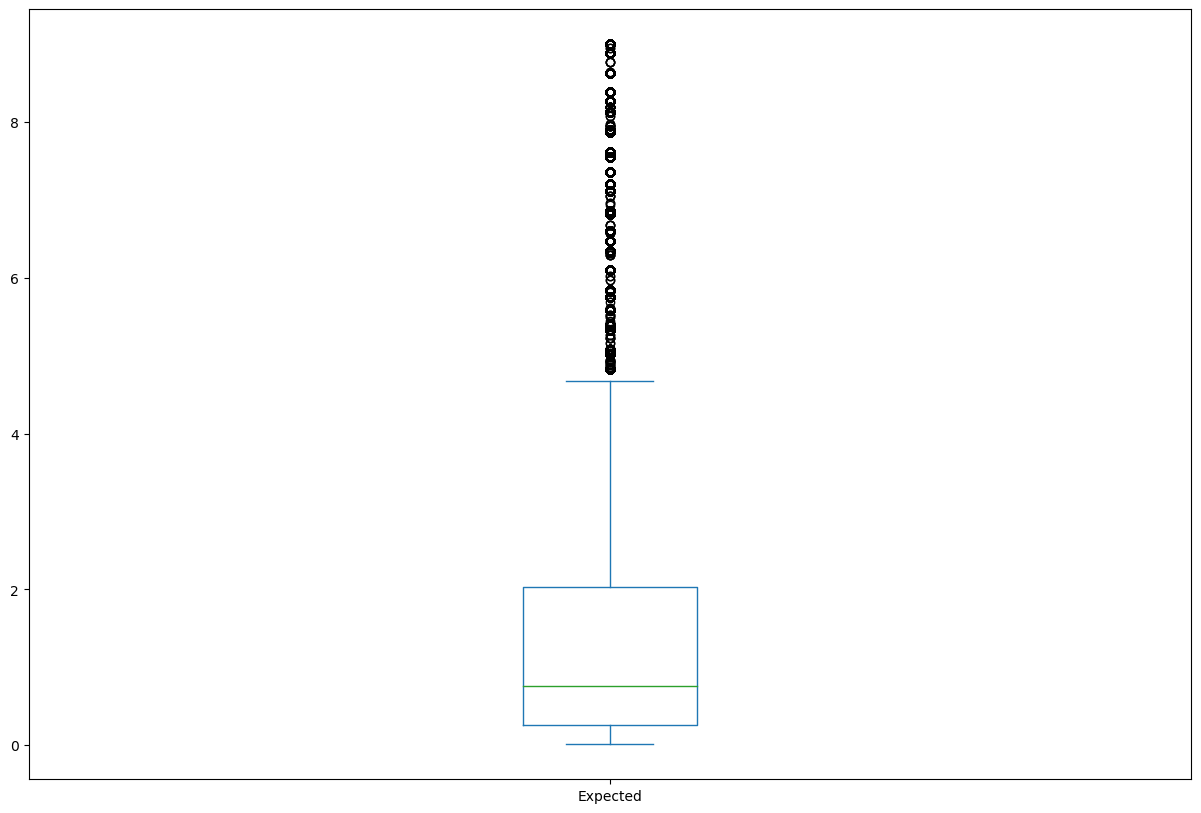

In [21]:
plt.figure(figsize=(15,10))
data_train_limited["Expected"].plot(kind="box")
plt.show()

##### Feature selection

In [22]:
y_limited=data_train_limited["Expected"]
y_limited

0          0.254000
1          1.016001
3          4.064002
5          0.254000
6          0.508000
             ...   
1180937    0.508000
1180941    1.524001
1180942    0.254000
1180943    3.556002
1180944    8.636004
Name: Expected, Length: 988781, dtype: float64

In [23]:
data_train_limited.drop(["Expected", "Id"], axis=1, inplace=True)
data_train_limited

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,29.833333,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,29.083333,2.0,16.625000,13.666667,17.375000,21.333333,22.666667,20.375000,22.916667,25.916667,...,0.998333,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661
3,28.153846,9.0,26.600000,20.071429,25.800000,30.269231,26.666667,21.090909,25.115385,32.230769,...,0.988333,1.015833,-1.125000,0.000000,0.500000,1.515625,7.029999,0.000000,0.000000,6.329994
5,29.833333,13.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,30.933333,13.0,14.750000,10.500000,12.500000,14.428571,14.750000,11.500000,14.875000,15.714286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180937,28.363636,10.0,19.000000,0.000000,19.000000,19.166667,23.000000,14.000000,23.000000,24.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1180941,28.461538,9.0,15.666667,13.000000,15.888889,19.950000,17.333333,14.000000,15.900000,19.772727,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1180942,26.500000,14.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1180943,30.764706,11.0,26.666667,24.375000,29.083333,33.906250,29.166667,26.000000,28.071429,35.468750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
data_train_limited.columns

Index(['minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th', 'Ref_5x5_50th',
       'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th'],
      dtype='object')

In [25]:
x_train_full, x_test_full, y_train_full, y_test_full=train_test_split(data_train_limited, y_limited, train_size=0.8, test_size=0.1, random_state=seed)
x_train_full

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
995085,28.588235,15.0,14.875000,0.000000,12.500000,17.300000,14.875000,0.000000,12.500000,17.500000,...,0.925000,1.026111,-0.500000,0.000000,-1.687500,1.291667,0.000000,0.000000,0.000000,7.569992
563377,28.714286,13.0,15.444444,12.300000,14.550000,17.821429,15.444444,12.300000,14.950000,18.750000,...,0.989444,1.051667,-0.812500,0.000000,-0.916667,3.208333,-3.169998,0.000000,-5.940003,7.079992
706940,30.000000,14.0,22.909091,19.818182,22.500000,26.681818,24.045455,21.454545,24.181818,27.954545,...,0.992500,1.035000,0.640625,-0.937500,0.265625,1.638889,-0.978756,-4.180004,0.352493,6.194996
940597,29.700000,4.0,21.650000,18.000000,22.000000,26.350000,28.600000,24.000000,28.000000,31.950000,...,0.983333,1.006333,0.950000,-0.013889,0.725000,1.881250,0.778885,-1.672504,0.195550,2.696660
909242,31.461538,9.0,19.400000,16.000000,17.100000,21.200000,17.666667,17.500000,18.100000,14.900000,...,1.045000,1.051667,3.041667,0.000000,0.625000,4.531250,0.000000,0.000000,0.000000,1.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318126,26.833333,14.0,32.083333,28.541667,32.750000,39.500000,35.333333,31.208333,35.208333,41.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
313224,27.916667,5.0,0.000000,0.000000,0.000000,0.000000,-1.500000,0.000000,0.000000,4.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
805838,30.428571,14.0,19.166667,0.000000,17.666667,22.700000,20.000000,0.000000,18.333333,23.700000,...,1.047667,1.051667,1.375000,0.000000,0.037500,2.236607,0.349991,0.000000,-2.485008,8.934438
66142,29.555556,15.0,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
x_test_full

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
1077343,30.166667,17.0,20.000000,16.700000,18.700000,21.200000,20.000000,16.700000,18.700000,21.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
98188,30.857143,13.0,13.750000,0.000000,11.500000,16.600000,13.750000,0.000000,11.500000,16.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
700824,29.142857,15.0,16.333333,11.500000,14.833333,16.428571,17.000000,15.750000,17.166667,17.187500,...,0.000000,0.992778,3.062500,0.000000,0.000000,1.791667,0.000000,0.000000,0.000000,-21.820007
422422,25.900000,16.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
861503,31.153846,11.0,11.250000,0.000000,10.125000,11.388889,12.125000,0.000000,10.500000,11.350000,...,1.022778,1.051410,-0.104167,-1.756250,0.468750,3.024038,-2.383003,-5.370004,-1.420914,3.758457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365976,29.307692,9.0,0.000000,0.000000,0.000000,13.500000,16.500000,0.000000,9.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
304607,29.916667,7.0,12.857143,9.000000,12.428571,19.562500,20.625000,16.000000,19.291667,25.375000,...,0.997000,1.015476,0.828125,-0.583333,0.325000,1.500000,-2.760010,-2.114998,-2.100001,2.959995
4133,29.272727,12.0,18.055556,15.583333,16.800000,21.300000,18.055556,15.750000,17.100000,21.750000,...,0.982576,1.042879,0.534091,-1.212500,-0.170455,1.823864,0.673742,-3.612507,-1.131114,4.434540
646046,28.333333,12.0,15.100000,13.000000,14.333333,16.666667,15.100000,13.000000,14.333333,16.666667,...,1.030833,1.051667,0.500000,-0.250000,0.015625,1.343750,0.469996,-2.809998,-2.727505,2.561990


In [27]:
y_train_full

995085    0.010000
563377    3.048002
706940    0.762000
940597    0.254000
909242    0.508000
            ...   
318126    0.210000
313224    0.010000
805838    0.254000
66142     0.020000
270400    0.254000
Name: Expected, Length: 791024, dtype: float64

In [28]:
y_test_full

1077343    0.010000
98188      4.826003
700824     1.524001
422422     1.524001
861503     0.254000
             ...   
365976     0.254000
304607     0.254000
4133       3.556002
646046     1.778001
1130779    3.556002
Name: Expected, Length: 98879, dtype: float64

#### Transformations (one hot encoder, standardisation)

In [29]:
x_train_full.columns=x_train_full.columns.astype(str)
x_train_full.columns

Index(['minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th', 'Ref_5x5_50th',
       'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th'],
      dtype='object')

In [30]:
x_test_full.columns=x_test_full.columns.astype(str)
x_test_full.columns

Index(['minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th', 'Ref_5x5_50th',
       'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th'],
      dtype='object')

In [31]:
scaler=StandardScaler()# MinMaxScaler()
scaler

StandardScaler()

In [32]:
##fit on scaler, data x_train_full
scaler.fit(x_train_full)

StandardScaler()

In [33]:
random_index=x_train_full.sample(10000).index.tolist()
random_index

[258963,
 616022,
 631644,
 13863,
 190654,
 40748,
 662771,
 779003,
 493122,
 158646,
 41848,
 1091727,
 795243,
 347854,
 835444,
 189884,
 593358,
 609119,
 488215,
 608731,
 457624,
 757467,
 194850,
 506420,
 1135163,
 287686,
 1147453,
 456889,
 204805,
 1178176,
 423637,
 182743,
 602730,
 18482,
 724537,
 99812,
 1157732,
 943938,
 331559,
 840698,
 856681,
 636000,
 925715,
 900627,
 150670,
 165586,
 686666,
 813688,
 876680,
 932832,
 383823,
 1155742,
 560119,
 916331,
 442545,
 779909,
 655187,
 43469,
 753511,
 464619,
 629528,
 1019011,
 877,
 58174,
 624331,
 793158,
 446894,
 1047606,
 989385,
 1161474,
 164810,
 43382,
 660694,
 82036,
 364532,
 512291,
 994610,
 559941,
 517871,
 418361,
 231895,
 101634,
 894644,
 1156401,
 815046,
 533028,
 1053540,
 351634,
 1096797,
 873401,
 768802,
 674252,
 656559,
 413303,
 885141,
 679880,
 802008,
 981544,
 1178617,
 1091334,
 231887,
 600764,
 973867,
 804432,
 3796,
 178809,
 1057696,
 1103196,
 188212,
 723222,
 491552,

In [34]:
x_train=x_train_full.loc[random_index]
x_train

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
258963,30.833333,13.0,17.833333,11.166667,15.666667,18.375000,19.333333,13.333333,17.333333,23.000000,...,0.996250,1.048333,0.250000,-1.833333,-0.070312,2.375000,0.003746,-3.690002,-0.380005,6.483744
616022,28.166667,6.0,19.583333,17.500000,19.333333,21.583333,19.666667,18.500000,19.750000,21.666667,...,0.995000,0.996667,0.218750,0.010417,0.239583,0.520833,0.058332,0.000000,0.000000,0.174995
631644,27.416667,8.0,20.666667,17.375000,21.250000,26.250000,28.083333,24.750000,27.541667,31.291667,...,1.001667,1.043519,1.218750,-0.916667,0.895833,3.104167,1.526662,-2.470001,-0.175003,4.923996
13863,30.300000,13.0,29.900000,14.500000,26.200000,33.500000,30.700000,15.500000,28.000000,35.083333,...,1.011667,1.042778,0.000000,0.000000,-0.250000,2.375000,0.000000,0.000000,-0.350006,2.983332
190654,30.583333,12.0,29.250000,25.750000,29.916667,34.916667,32.041667,28.625000,32.583333,36.541667,...,0.998056,1.016111,0.885417,-0.363636,0.755208,1.989583,0.672724,-1.953004,-0.143340,3.192493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654899,27.800000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
68078,29.526316,11.0,17.656250,14.650000,16.666667,20.823529,18.343750,15.136364,17.166667,21.058824,...,0.000000,1.051667,0.000000,0.000000,0.000000,0.687500,0.000000,0.000000,0.000000,0.000000
129646,31.000000,11.0,31.153846,27.807692,31.653846,35.615385,33.076923,30.615385,33.923077,37.692308,...,1.005000,1.046852,0.275000,-0.666667,-0.114583,1.895833,-0.884006,-5.505005,-1.908002,2.663328
70859,30.400000,8.0,14.500000,8.000000,12.833333,16.700000,15.142857,18.250000,12.785714,19.222222,...,0.993750,1.032667,-0.281250,-0.825000,0.273438,2.062500,-1.432864,-2.933334,-2.008575,3.496662


In [35]:
y_train=y_train_full.loc[random_index]
y_train

258963    0.254000
616022    0.020000
631644    1.800001
13863     6.858004
190654    1.778001
            ...   
654899    0.254000
68078     0.254000
129646    4.572002
70859     0.254000
35035     1.016001
Name: Expected, Length: 10000, dtype: float64

In [36]:
x_test=x_test_full
x_test

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
1077343,30.166667,17.0,20.000000,16.700000,18.700000,21.200000,20.000000,16.700000,18.700000,21.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
98188,30.857143,13.0,13.750000,0.000000,11.500000,16.600000,13.750000,0.000000,11.500000,16.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
700824,29.142857,15.0,16.333333,11.500000,14.833333,16.428571,17.000000,15.750000,17.166667,17.187500,...,0.000000,0.992778,3.062500,0.000000,0.000000,1.791667,0.000000,0.000000,0.000000,-21.820007
422422,25.900000,16.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
861503,31.153846,11.0,11.250000,0.000000,10.125000,11.388889,12.125000,0.000000,10.500000,11.350000,...,1.022778,1.051410,-0.104167,-1.756250,0.468750,3.024038,-2.383003,-5.370004,-1.420914,3.758457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365976,29.307692,9.0,0.000000,0.000000,0.000000,13.500000,16.500000,0.000000,9.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
304607,29.916667,7.0,12.857143,9.000000,12.428571,19.562500,20.625000,16.000000,19.291667,25.375000,...,0.997000,1.015476,0.828125,-0.583333,0.325000,1.500000,-2.760010,-2.114998,-2.100001,2.959995
4133,29.272727,12.0,18.055556,15.583333,16.800000,21.300000,18.055556,15.750000,17.100000,21.750000,...,0.982576,1.042879,0.534091,-1.212500,-0.170455,1.823864,0.673742,-3.612507,-1.131114,4.434540
646046,28.333333,12.0,15.100000,13.000000,14.333333,16.666667,15.100000,13.000000,14.333333,16.666667,...,1.030833,1.051667,0.500000,-0.250000,0.015625,1.343750,0.469996,-2.809998,-2.727505,2.561990


In [37]:
y_test=y_test_full
y_test

1077343    0.010000
98188      4.826003
700824     1.524001
422422     1.524001
861503     0.254000
             ...   
365976     0.254000
304607     0.254000
4133       3.556002
646046     1.778001
1130779    3.556002
Name: Expected, Length: 98879, dtype: float64

In [38]:
x_train=pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_train

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,0.793261,0.456427,0.348884,0.084383,0.212730,0.120520,0.352591,0.144092,0.236589,0.373369,...,1.005060,0.899038,-0.079836,-2.168085,-0.316190,0.848505,-0.011421,-0.925074,0.017381,1.469419
1,-0.816884,-1.166242,0.498080,0.691146,0.526034,0.367416,0.379251,0.595102,0.429938,0.275659,...,1.002503,0.795911,-0.116811,0.561260,0.214375,-0.460825,0.016724,0.647046,0.277813,-0.605666
2,-1.269738,-0.702622,0.590440,0.679170,0.689807,0.726537,1.052431,1.140678,1.053322,0.981003,...,1.016143,0.889428,1.066400,-0.811123,1.337926,1.363410,0.773828,-0.405294,0.157876,0.956384
3,0.471232,0.456427,1.377629,0.403732,1.112768,1.284458,1.261716,0.333225,1.089992,1.258866,...,1.036602,0.887949,-0.375638,0.545840,-0.623829,0.848505,-0.013353,0.647046,0.037940,0.318058
4,0.642309,0.224618,1.322213,1.481535,1.430345,1.393477,1.369025,1.478935,1.456688,1.365736,...,1.008754,0.834723,0.671996,0.007541,1.097165,0.576341,0.333518,-0.185029,0.179576,0.386855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.038279,-0.702622,-1.171499,-0.985437,-1.125935,-1.293522,-1.193723,-1.019804,-1.150190,-1.312129,...,-1.033237,-1.193437,-0.375638,0.545840,-0.195810,-0.828614,-0.013353,0.647046,0.277813,-0.663226
9996,0.004078,-0.007192,0.333787,0.418102,0.298176,0.308945,0.273442,0.301482,0.223255,0.231114,...,-1.033237,0.905692,-0.375638,0.545840,-0.195810,-0.343132,-0.013353,0.647046,0.277813,-0.663226
9997,0.893895,-0.007192,1.484525,1.678672,1.578781,1.447247,1.451827,1.652680,1.563876,1.450058,...,1.022963,0.896081,-0.050255,-0.441042,-0.391985,0.510139,-0.469166,-1.698353,-1.029815,0.212801
9998,0.531612,-0.702622,0.064700,-0.218999,-0.029369,-0.008379,0.017429,0.573279,-0.127250,0.096524,...,0.999945,0.867768,-0.708416,-0.675427,0.272336,0.627832,-0.752169,-0.602697,-1.098742,0.486903


In [39]:
x_test=pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_test

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,0.390724,1.383667,0.533603,0.614502,0.471918,0.337916,0.405912,0.437976,0.345931,0.241460,...,-1.033237,-1.193437,-0.375638,0.545840,-0.195810,-0.828614,-0.013353,0.647046,0.277813,-0.663226
1,0.807637,0.456427,0.000759,-0.985437,-0.143298,-0.016075,-0.093974,-1.019804,-0.230115,-0.080983,...,-1.033237,-1.193437,-0.375638,0.545840,-0.195810,-0.828614,-0.013353,0.647046,0.277813,-0.663226
2,-0.227456,0.920047,0.221001,0.116318,0.141524,-0.029267,0.165967,0.355048,0.223255,-0.052586,...,-1.033237,0.788149,3.247944,0.545840,-0.195810,0.436581,-0.013353,0.647046,0.277813,-7.840303
3,-2.185508,1.151857,-1.171499,-0.985437,-1.125935,-1.293522,-1.193723,-1.019804,-1.150190,-1.312129,...,-1.033237,-1.193437,-0.375638,0.545840,-0.195810,-0.828614,-0.013353,0.647046,0.277813,-0.663226
4,0.986788,-0.007192,-0.212379,-0.985437,-0.260787,-0.417094,-0.223944,-1.019804,-0.310122,-0.480373,...,1.059335,0.905180,-0.498889,-2.053977,0.606727,1.306827,-1.242082,-1.640836,-0.695995,0.573013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98874,-0.127928,-0.470812,-1.171499,-0.985437,-1.125935,-0.254634,0.125976,-1.019804,-0.430132,-0.286174,...,-1.033237,-1.193437,-0.375638,0.545840,-0.195810,-0.828614,-0.013353,0.647046,0.277813,-0.663226
98875,0.239773,-0.934432,-0.075362,-0.123194,-0.063955,0.211903,0.455900,0.376871,0.393269,0.547415,...,1.006595,0.833455,0.604208,-0.317682,0.360615,0.230619,-1.436474,-0.254046,-1.161400,0.310381
98876,-0.149040,0.224618,0.367829,0.507520,0.309569,0.345612,0.250392,0.355048,0.217921,0.281766,...,0.977083,0.888151,0.256304,-1.249052,-0.487641,0.459317,0.334043,-0.892057,-0.497384,0.795391
98877,-0.716250,0.224618,0.115853,0.260025,0.098801,-0.010945,0.014001,0.114994,-0.003430,-0.090754,...,1.075817,0.905692,0.215967,0.175759,-0.169059,0.120282,0.228987,-0.550149,-1.591452,0.179469


### Machine Learning Model Building and Test
##### Metrics

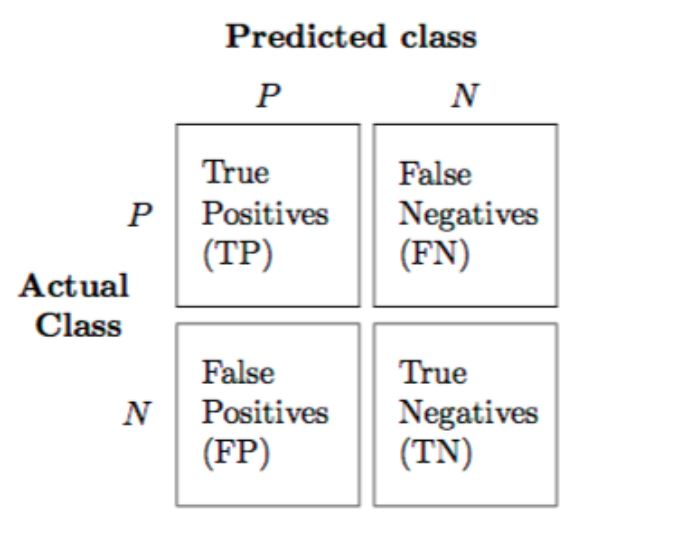

In [40]:
Image(r"C:\Users\Shashi Shekhar\Pictures\python practice\matrix.jpg", width=600)

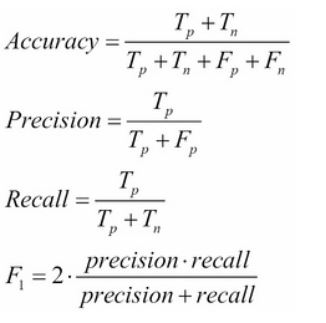

In [41]:
Image(r"C:\Users\Shashi Shekhar\Pictures\python practice\Formula.jpg", width=300)

In [42]:
objectModel={}
objectModel

{}

In [43]:
metrics={"model":[], "score_CV":[], "RMSE":[]}
crossValidation=5
verbose=0
scoring="negative_mean_squared_error"
n_jobs=1
n_models=0

#### Strategy

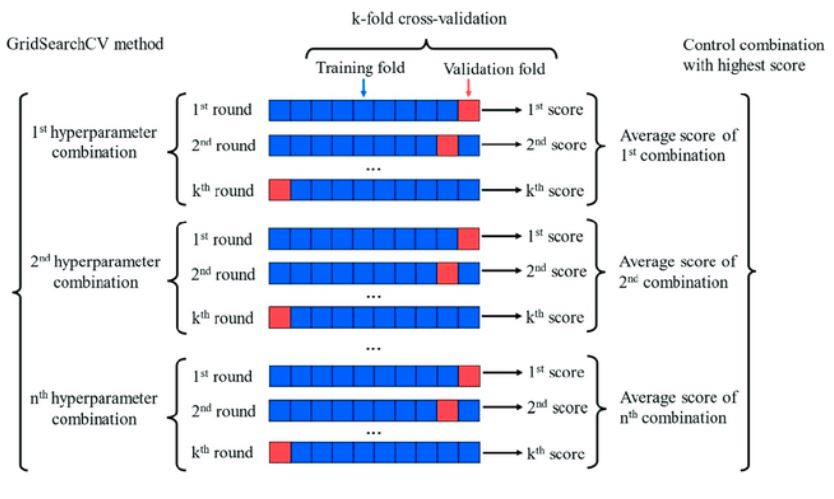

In [44]:
Image(r"C:\Users\Shashi Shekhar\Pictures\python practice\GridSearchCV.jpg", width=1100)

## Models
#### *Linear Regression (BenchMark)
#### *Support Vector Machine (SVM)
#### *Multilayer Perceptron (Neural Network)
#### *Decision Tree
#### *Gradient Boosting
#### *XGBoost
#### *RandomForest 0.882986
#### *K-Nearest Neighbours (KNN)


### Linear Regression (BenchMark)

In [45]:
metrics["model"].append("Linear Regression (BenchMark)")
modelReg = LinearRegression()
modelReg.fit(x_train, y_train)

LinearRegression()

In [46]:
objectModel["Linear Regression (BenchMark)"] = modelReg
y_predictionReg = modelReg.predict(x_test)
y_predictionReg

array([2.30571597, 1.45921667, 2.25119086, ..., 1.65142628, 1.44287227,
       2.31545101])

In [47]:
metrics["RMSE"].append(mean_squared_error(y_test, y_predictionReg, squared=False))
metrics["score_CV"].append(mean_squared_error(y_test, y_predictionReg, squared=False))
n_models += 1
n_models

1

### Support Vector Machine (SVM)

In [48]:
from sklearn.svm import SVR

In [49]:
metrics["model"].append("Support Vector Machine (SVM)")
parametersSVR = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
    'degree': [3],
    'gamma': ['scale'],
    'coef0': [0.0],
    'tol': [0.001],
    'C': [1.0],
    'epsilon': [0.1],
    'shrinking': [True],
    'cache_size': [200],
    'max_iter': [-1]
}

optimumParametersSVR = {
    'kernel': ['linear'],
    'degree': [3],
    'gamma': ['scale'],
    'coef0': [0.0],
    'tol': [0.001],
    'C': [1.0],
    'epsilon': [0.1],
    'shrinking': [True],
    'cache_size': [200],
    'max_iter': [-1]
}

In [50]:
_modelSVR = svm.SVR(verbose = verbose)
clfSVR = GridSearchCV(estimator=_modelSVR,
                      param_grid = parametersSVR if tunning else optimumParametersSVR,
                      cv = crossValidation,
                      scoring = "neg_mean_squared_error",
                      refit = True)

clfSVR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(verbose=0),
             param_grid={'C': [1.0], 'cache_size': [200], 'coef0': [0.0],
                         'degree': [3], 'epsilon': [0.1], 'gamma': ['scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [-1], 'shrinking': [True],
                         'tol': [0.001]},
             scoring='neg_mean_squared_error')

#### Best hyperparameters for this model

In [51]:
if(tunning):
    print(clfSVR.best_params_)

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001}


In [52]:
pd.DataFrame(clfSVR.cv_results_).sort_values(
    by=['rank_test_score'], ascending = True).loc[:, ['rank_test_score', 'mean_test_score', 
                                                      'std_test_score', 'mean_fit_time']].set_index('rank_test_score')

,mean_test_score,std_test_score,mean_fit_time
rank_test_score,,,
1,-2.845891,0.118838,14.735355
2,-3.087324,0.140434,32.555108
3,-3.294715,0.371141,23.443386
4,-4006.588675,87.119685,17.111003


In [53]:
modelSVR = clfSVR.best_estimator_
objectModel["Support Vector Machine (SVM)"] = modelSVR
y_predictionSVR = modelSVR.predict(x_test)
y_predictionSVR

array([1.49226333, 0.74460005, 0.97176234, ..., 0.86965696, 0.70385428,
       1.55723211])

In [54]:
metrics["RMSE"].append(mean_squared_error(y_predictionSVR, y_test, squared=False))
metrics["score_CV"].append(np.sqrt(abs(clfSVR.best_score_)))
n_models += len(clfSVR.cv_results_['rank_test_score'])
n_models

5

### Multilayer Perceptron (Neural Network)

In [55]:
metrics["model"].append("Multilayer Perceptron (Neural Network)")

In [56]:
parametersMLP = {
    'max_iter': [2000],
    "hidden_layer_sizes": [(10, 2), (10, 3), (10, 4)],
    "activation": ['identity', 'logistic', 'tanh', 'relu'], # 'identity', 'logistic', 'tanh', 'relu'
    "solver": ['lbfgs', 'sgd', 'adam'], # 'lbfgs', 'sgd', 'adam'
    "alpha": [0.0001],
    "batch_size": ['auto'],
    "learning_rate": ['adaptive'],
    "learning_rate_init": [0.1],
    "power_t": [0.5],
    "shuffle": [False],
    "tol": [0.0001],
    "warm_start": [False],
    "momentum": [0.9, 0],
    "nesterovs_momentum": [True],
    "early_stopping": [True],
    "validation_fraction": [0.1],
    "beta_1": [0.9],
    "beta_2": [0.999],
    "epsilon": [1e-08],
    "n_iter_no_change": [10],
    "max_fun": [15000]
}

optimumParametersMLP = {
    'max_iter': [1000],
    'activation': ['relu'],
    'alpha': [0.0001],
    'batch_size': ['auto'],
    'beta_1': [0.9],
    'beta_2': [0.999],
    'early_stopping': [False],
    'epsilon': [1e-08],
    'hidden_layer_sizes': [(10, 4)],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.001],
    'max_fun': [15000],
    'momentum': [0.9],
    'n_iter_no_change': [10],
    'nesterovs_momentum': [True],
    'power_t': [0.5],
    'shuffle': [False],
    'solver': ['adam'],
    'tol': [0.0001],
    'validation_fraction': [0.1],
    'warm_start': [False]
}

In [57]:
_modelMLP = MLPRegressor(verbose = verbose, random_state = seed)

In [58]:
clfMLP = GridSearchCV(estimator=_modelMLP,
                      param_grid = parametersMLP if tunning else optimumParametersMLP,
                      cv = crossValidation,
                      scoring = "neg_mean_squared_error",
                      refit = True)
clfMLP

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=25, verbose=0),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001], 'batch_size': ['auto'],
                         'beta_1': [0.9], 'beta_2': [0.999],
                         'early_stopping': [True], 'epsilon': [1e-08],
                         'hidden_layer_sizes': [(10, 2), (10, 3), (10, 4)],
                         'learning_rate': ['adaptive'],
                         'learning_rate_init': [0.1], 'max_fun': [15000],
                         'max_iter': [2000], 'momentum': [0.9, 0],
                         'n_iter_no_change': [10], 'nesterovs_momentum': [True],
                         'power_t': [0.5], 'shuffle': [False],
                         'solver': ['lbfgs', 'sgd', 'adam'], 'tol': [0.0001],
                         'validation_fraction': [0.1], 'warm_start': [False]},
             scoring='neg_mean_squared_error')

In [59]:
clfMLP.fit(x_train, y_train)

C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=wher

C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status

C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status

C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status

C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status

C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=25, verbose=0),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001], 'batch_size': ['auto'],
                         'beta_1': [0.9], 'beta_2': [0.999],
                         'early_stopping': [True], 'epsilon': [1e-08],
                         'hidden_layer_sizes': [(10, 2), (10, 3), (10, 4)],
                         'learning_rate': ['adaptive'],
                         'learning_rate_init': [0.1], 'max_fun': [15000],
                         'max_iter': [2000], 'momentum': [0.9, 0],
                         'n_iter_no_change': [10], 'nesterovs_momentum': [True],
                         'power_t': [0.5], 'shuffle': [False],
                         'solver': ['lbfgs', 'sgd', 'adam'], 'tol': [0.0001],
                         'validation_fraction': [0.1], 'warm_start': [False]},
             scoring='neg_mean_squared_error')

#### Best hyperparameters for this model

In [60]:
if(tunning):
    print(clfMLP.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (10, 4), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'max_fun': 15000, 'max_iter': 2000, 'momentum': 0, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'shuffle': False, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'warm_start': False}


In [61]:
pd.DataFrame(clfMLP.cv_results_).sort_values(by=['rank_test_score'], 
                                             ascending = True).loc[:, [
    'rank_test_score', 'mean_test_score', 'std_test_score', 'mean_fit_time']].set_index('rank_test_score')

,mean_test_score,std_test_score,mean_fit_time
rank_test_score,,,
1,-2.606376,0.120354,5.985982
2,-2.608059,0.129158,7.145724
3,-2.608904,0.106534,7.272036
4,-2.613724,0.109608,9.352648
5,-2.618068,0.095814,8.648057
...,...,...,...
68,-3.393031,0.530910,63.803711
68,-3.393031,0.530910,64.271973
70,NaN,NaN,0.902490


In [62]:
modelMLP = clfMLP.best_estimator_
objectModel["Multilayer Perceptron (Neural Network)"] = modelMLP
y_predictionMLP = modelMLP.predict(x_test)
y_predictionMLP

array([2.33221135, 1.14552801, 1.15895275, ..., 1.3880814 , 1.24119059,
       2.35115773])

In [63]:
metrics["RMSE"].append(mean_squared_error(y_predictionMLP, y_test, squared=False))
metrics["score_CV"].append(np.sqrt(abs(clfMLP.best_score_)))
n_models += len(clfMLP.cv_results_['rank_test_score'])
n_models

77

#### Decision Tree

In [64]:
metrics["model"].append("Decision Tree")
parametersDecTree = {
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter": ['best', 'random'],
    "max_depth": [None],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2],
    "min_weight_fraction_leaf": [0.0],
    "max_features": ['auto', 'sqrt', 'log2'],
    "max_leaf_nodes": [None],
    "min_impurity_decrease": [0.0],
    "ccp_alpha": [0.0]
}

optimumParametersDecTree = {
    'ccp_alpha': [0.0],
    'criterion': ['poisson'],
    'max_depth': [None],
    'max_features': ['auto'],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [1],
    'min_samples_split': [4],
    'min_weight_fraction_leaf': [0.0],
    'splitter': ['random']
}

In [65]:
_modelDecTree = DecisionTreeRegressor(random_state = seed)
clfDecTree = GridSearchCV(estimator=_modelDecTree,
                          param_grid = parametersDecTree if tunning else optimumParametersDecTree,
                          cv = crossValidation,
                          scoring = "neg_mean_squared_error",
                          refit = True)
clfDecTree.fit(x_train, y_train)

C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\U

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=25),
             param_grid={'ccp_alpha': [0.0],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'min_weight_fraction_leaf': [0.0],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

### Best hyperparameters for this model

In [66]:
if(tunning):
    print(clfDecTree.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}


In [67]:
pd.DataFrame(clfDecTree.cv_results_).sort_values(by=['rank_test_score'], ascending = True).loc[:, ['rank_test_score', 'mean_test_score', 'std_test_score', 'mean_fit_time']].set_index('rank_test_score')

,mean_test_score,std_test_score,mean_fit_time
rank_test_score,,,
1,-3.546294,0.137239,0.036385
1,-3.546294,0.137239,0.036579
1,-3.546294,0.137239,0.037976
1,-3.546294,0.137239,0.038976
1,-3.546294,0.137239,0.037976
...,...,...,...
97,NaN,NaN,0.005208
97,NaN,NaN,0.005202
97,NaN,NaN,0.005203


In [68]:
modelDecTree = clfDecTree.best_estimator_
objectModel["Decision Tree"] = modelDecTree
y_predictionDecTree = modelDecTree.predict(x_test)
y_predictionDecTree

array([1.55248362, 1.55248362, 1.14300057, ..., 1.10066721, 0.25400013,
       0.66450037])

#### Gradient Boosting

In [69]:
metrics["RMSE"].append(mean_squared_error(y_predictionDecTree, y_test, squared=False))
metrics["score_CV"].append(np.sqrt(abs(clfDecTree.best_score_)))
n_models += len(clfDecTree.cv_results_['rank_test_score'])
n_models

221

In [70]:
metrics["model"].append("Gradient Boosting")
parametersGB = {
    "loss": ['squared_error'], # 'absolute_error', 'huber', 'quantile'
    "learning_rate": [0.1], # 0.01, 0.001
    "n_estimators": [100, 200, 250],
    "subsample": [1.0],
    "criterion": ['friedman_mse', 'squared_error'],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2],
    "min_weight_fraction_leaf": [0.0],
    "max_depth": [3],
    "min_impurity_decrease": [0.0],
    "init": [None],
    "max_features": [None],
    "max_leaf_nodes": [None],
    "warm_start": [False],
    "validation_fraction": [0.01],
    "n_iter_no_change": [None],
    "tol": [0.0001],
    "ccp_alpha": [0.0]
}

optimumParametersGB = {
    'ccp_alpha': [0.0],
    'criterion': ['friedman_mse'],
    'init': [None],
    'learning_rate': [0.1],
    'loss': ['squared_error'],
    'max_depth': [3],
    'max_features': [None],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [1],
    'min_samples_split': [3],
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': [250],
    'n_iter_no_change': [None],
    'subsample': [1.0],
    'tol': [0.0001],
    'validation_fraction': [0.1],
    'warm_start': [False]
}

In [71]:
_modelGB = GradientBoostingRegressor(verbose = verbose, random_state = seed)

In [74]:
clfGB = GridSearchCV(estimator=_modelGB,
                     param_grid = parametersGB if tunning else optimumParametersGB,
                     cv = crossValidation,
                     scoring = "neg_mean_squared_error",
                     refit = True)
clfGB.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=25),
             param_grid={'ccp_alpha': [0.0],
                         'criterion': ['friedman_mse', 'squared_error'],
                         'init': [None], 'learning_rate': [0.1],
                         'loss': ['squared_error'], 'max_depth': [3],
                         'max_features': [None], 'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100, 200, 250],
                         'n_iter_no_change': [None], 'subsample': [1.0],
                         'tol': [0.0001], 'validation_fraction': [0.01],
                         'warm_start': [False]},
             scoring='neg_mean_squared_error')

In [75]:
if(tunning):
    print(clfGB.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.01, 'warm_start': False}


In [76]:
pd.DataFrame(clfGB.cv_results_).sort_values(by=['rank_test_score'], ascending = True).loc[:, ['rank_test_score', 'mean_test_score', 'std_test_score', 'mean_fit_time']].set_index('rank_test_score')

,mean_test_score,std_test_score,mean_fit_time
rank_test_score,,,
1,-2.604463,0.101214,13.942222
2,-2.605015,0.100860,13.982999
3,-2.607310,0.104979,13.936425
4,-2.607383,0.105089,13.840880
5,-2.608242,0.100354,13.817093
...,...,...,...
31,-2.627172,0.082860,34.593997
31,-2.627172,0.082860,34.552035
34,-2.627327,0.082780,34.754238


In [77]:
modelGB = clfGB.best_estimator_
objectModel["Gradient Boosting"] = modelGB
y_predictionGB = modelGB.predict(x_test)
y_predictionGB

array([2.26298424, 1.06892793, 1.42702802, ..., 1.26883913, 1.238304  ,
       2.03069953])

In [78]:
metrics["RMSE"].append(mean_squared_error(y_predictionGB, y_test, squared=False))
metrics["score_CV"].append(np.sqrt(abs(clfGB.best_score_)))
n_models += len(clfGB.cv_results_['rank_test_score'])
n_models

257

#### XGBoost

In [79]:
metrics["model"].append("XGBoost")

In [80]:
parametersXGB = {
    "max_depth": [5, 6, 7],
    "learning_rate": [0.1],
    "n_estimators": [100, 150],
    "objective": ['reg:squarederror'],
    "subsample": [1],
    "colsample_bytree": [1],
    "reg_alpha": [0],
    "reg_lambda": [1],
    "eval_metric": ['rmse'],
    "gama": [0],
    "min_child_weight": [1]
}

optimumParametersXGB = {
    "max_depth": [5],
    "learning_rate": [0.1],
    "n_estimators": [150],
    "objective": ['reg:squarederror'],
    "subsample": [1],
    "colsample_bytree": [1],
    "reg_alpha": [0],
    "reg_lambda": [1],
    "eval_metric": ['rmse'],
    "gama": [0],
    "min_child_weight": [1]
}

In [81]:
_modelXGB = XGBRegressor(verbosity = verbose, random_state=seed)

In [85]:
clfXGB = GridSearchCV(estimator=_modelXGB,
                      param_grid = parametersXGB if tunning else optimumParametersXGB,
                      cv = crossValidation,
                      scoring = "neg_mean_squared_error",
                      refit = True)
clfXGB.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=25, ...),
             param_grid={'colsample_bytree': [1], 'eval_metric': ['rmse'],
                         'gama': [0], 'learning_rate': [0.1],
                         'max_depth': [5, 6, 7], 'min_child_weight': [1],
                         'n_estimators': [100, 150],
                         'objective': ['reg:squarederror'], 'reg_alpha': [0],
                         'reg_lambda': [1], 'subsample': [1]},
             scoring='neg_mean_squared_error')

#### Best hyperparameters for this model

In [86]:
if(tunning):
    print(clfXGB.best_params_)

{'colsample_bytree': 1, 'eval_metric': 'rmse', 'gama': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'reg:squarederror', 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1}


In [87]:
pd.DataFrame(clfXGB.cv_results_).loc[:, ['rank_test_score', 'mean_test_score', 'std_test_score', 'mean_fit_time']].set_index('rank_test_score')

,mean_test_score,std_test_score,mean_fit_time
rank_test_score,,,
1,-2.621428,0.096591,0.899278
2,-2.643733,0.097553,1.293460
3,-2.652864,0.083660,1.272472
5,-2.691714,0.085347,1.950284
4,-2.676143,0.092806,1.671443
6,-2.704082,0.097002,2.451395


In [88]:
modelXGB = clfXGB.best_estimator_
objectModel["XGBoost"] = modelXGB
y_predictionXGB = modelXGB.predict(x_test)
y_predictionXGB

array([2.568785 , 1.0942838, 1.5386946, ..., 1.3112187, 1.6493541,
       2.4224741], dtype=float32)

In [89]:
metrics["RMSE"].append(mean_squared_error(y_predictionXGB, y_test, squared=False))
metrics["score_CV"].append(np.sqrt(abs(clfXGB.best_score_)))
n_models += len(clfXGB.cv_results_['rank_test_score'])
n_models

263

### Random Forest

In [90]:
metrics["model"].append("Random Forest")

In [91]:
parametersRF = {
    "n_estimators": [100, 150, 200],
    "criterion": ['squared_error'], # 'squared_error', 'absolute_error', 'friedman_mse', 'poisson'
    "max_depth": [None, 4],
    "min_samples_split": [1, 2, 3],
    "min_samples_leaf": [1, 2],
    "min_weight_fraction_leaf": [0.0],
    "max_features": ['auto', 'sqrt', 'log2'],
    "max_leaf_nodes": [None],
    "min_impurity_decrease": [0.0],
    "bootstrap": [True, False],
    "oob_score": [False],
    "warm_start": [False],
    "ccp_alpha": [0.0],
    "max_samples": [None]
}

optimumParametersRF = {
    "n_estimators": [100],
    "criterion": ['squared_error'],
    "max_depth": [None],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "min_weight_fraction_leaf": [0.0],
    "max_features": ['sqrt', 'log2'],
    "max_leaf_nodes": [None],
    "min_impurity_decrease": [0.0],
    "bootstrap": [True],
    "oob_score": [False],
    "warm_start": [False],
    "ccp_alpha": [0.0],
    "max_samples": [None]
}

In [92]:
_modelRF = RandomForestRegressor(verbose = verbose, random_state = seed, n_jobs = n_jobs)

In [94]:
clfRF = GridSearchCV(estimator=_modelRF,
                     param_grid = parametersRF if tunning else optimumParametersRF,
                     cv = crossValidation,
                     scoring = "neg_mean_squared_error",
                     refit = True)
clfRF.fit(x_train, y_train)

C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
600 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=1, random_state=25),
             param_grid={'bootstrap': [True, False], 'ccp_alpha': [0.0],
                         'criterion': ['squared_error'], 'max_depth': [None, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None], 'max_samples': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100, 150, 200], 'oob_score': [False],
                         'warm_start': [False]},
             scoring='neg_mean_squared_error')

#### Best hyperparameters for this model

In [95]:
if(tunning):
    print(clfRF.best_params_)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'oob_score': False, 'warm_start': False}


In [96]:
pd.DataFrame(clfRF.cv_results_).sort_values(by=['rank_test_score'], ascending = True).loc[:, ['rank_test_score', 'mean_test_score', 'std_test_score', 'mean_fit_time']].set_index('rank_test_score')

,mean_test_score,std_test_score,mean_fit_time
rank_test_score,,,
1,-2.612635,0.10091,18.529803
1,-2.612635,0.10091,18.379081
1,-2.612635,0.10091,18.957745
1,-2.612635,0.10091,18.454032
5,-2.613446,0.09892,14.562065
...,...,...,...
97,NaN,NaN,0.005996
97,NaN,NaN,0.005797
97,NaN,NaN,0.005997


In [97]:
modelRF = clfRF.best_estimator_
objectModel["Random Forest"] = modelRF
y_predictionRF = modelRF.predict(x_test)
y_predictionRF

array([2.4192843 , 1.08580595, 1.9796239 , ..., 1.19979623, 1.52913042,
       2.6935345 ])

In [98]:
metrics["RMSE"].append(mean_squared_error(y_predictionRF, y_test, squared=False))
metrics["score_CV"].append(np.sqrt(abs(clfRF.best_score_)))
n_models += len(clfRF.cv_results_['rank_test_score'])
n_models

479

#### K-Nearest Neighbors (KNN)

In [99]:
metrics["model"].append("K-Nearest Neighbors (KNN)")

In [100]:
parameterskKNN = {
    "n_neighbors": [3, 5, 7],
    "weights": ['uniform', 'distance'],
}
optimumParameterskKNN = {
    'n_neighbors': [5],
    'weights': ['uniform']
}

In [101]:
_modelKNN = KNeighborsRegressor(n_jobs = n_jobs)

In [102]:
clfKNN = GridSearchCV(estimator=_modelKNN,
                      param_grid = parameterskKNN if tunning else optimumParameterskKNN,
                      cv = crossValidation,
                      scoring = "neg_mean_squared_error",
                      refit = True)
clfKNN.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=1),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

#### Best hyperparameters for this model

In [103]:
if(tunning):
    print(clfKNN.best_params_)

{'n_neighbors': 7, 'weights': 'uniform'}


In [104]:
pd.DataFrame(clfKNN.cv_results_).sort_values(by=['rank_test_score'], ascending = True).loc[:, ['rank_test_score', 'mean_test_score', 'std_test_score', 'mean_fit_time']].set_index('rank_test_score')

,mean_test_score,std_test_score,mean_fit_time
rank_test_score,,,
1,-2.913918,0.172155,0.015992
2,-3.008641,0.174287,0.014992
3,-3.068160,0.159537,0.014791
4,-3.150873,0.163699,0.012792
5,-3.340238,0.144159,0.013392
6,-3.409542,0.154101,0.015190


In [105]:
modelKNN = clfKNN.best_estimator_
objectModel["K-Nearest Neighbors (KNN)"] = modelKNN
y_predictionKNN = modelKNN.predict(x_test)
y_predictionKNN

array([1.81714376, 1.4514293 , 1.52400078, ..., 1.32000066, 1.70542945,
       2.53114421])

In [106]:
metrics["RMSE"].append(mean_squared_error(y_predictionKNN, y_test, squared=False))
metrics["score_CV"].append(np.sqrt(abs(clfKNN.best_score_)))
n_models += len(clfKNN.cv_results_['rank_test_score'])
n_models

485

## Machine Learning Model Validation and Selection

In [107]:
end_time = time.time()
end_time

1712146385.0032895

In [108]:
execution_time = end_time - start_time
execution_time

25485.41326713562

In [110]:
result = pd.DataFrame(metrics).sort_values(by=['score_CV'], ascending=True).reset_index(drop = True)
result

,model,score_CV,RMSE
0,Gradient Boosting,1.613835,1.597210
1,Multilayer Perceptron (Neural Network),1.614427,1.601874
2,Random Forest,1.616365,1.600661
3,XGBoost,1.619082,1.602662
4,Linear Regression (BenchMark),1.630458,1.630458
5,Support Vector Machine (SVM),1.686977,1.681569
6,K-Nearest Neighbors (KNN),1.707020,1.695781
7,Decision Tree,1.883161,1.848307


In [112]:
result.index += 1
result

,model,score_CV,RMSE
2,Gradient Boosting,1.613835,1.597210
3,Multilayer Perceptron (Neural Network),1.614427,1.601874
4,Random Forest,1.616365,1.600661
5,XGBoost,1.619082,1.602662
6,Linear Regression (BenchMark),1.630458,1.630458
7,Support Vector Machine (SVM),1.686977,1.681569
8,K-Nearest Neighbors (KNN),1.707020,1.695781
9,Decision Tree,1.883161,1.848307


In [113]:
bestMetric = round(result.loc[result.index[0], 'score_CV'] * 100, 2)
bestMetric

161.38

In [120]:
display(Markdown(f"### 3.1 After <font color='blue'><u>{round(execution_time/60, 1)} minutes</u></font> of training, among <font color='blue'><u>{n_models * crossValidation}</u></font> trained ML Models, the chosen model was: <font color='blue'><u>{result.loc[2, 'model']}</u></font> with {scoring}: {bestMetric}"))

### 3.1 After <font color='blue'><u>424.8 minutes</u></font> of training, among <font color='blue'><u>2425</u></font> trained ML Models, the chosen model was: <font color='blue'><u>Gradient Boosting</u></font> with negative_mean_squared_error: 161.38

In [121]:
result

,model,score_CV,RMSE
2,Gradient Boosting,1.613835,1.597210
3,Multilayer Perceptron (Neural Network),1.614427,1.601874
4,Random Forest,1.616365,1.600661
5,XGBoost,1.619082,1.602662
6,Linear Regression (BenchMark),1.630458,1.630458
7,Support Vector Machine (SVM),1.686977,1.681569
8,K-Nearest Neighbors (KNN),1.707020,1.695781
9,Decision Tree,1.883161,1.848307


In [123]:
selectedModel = objectModel[result.loc[2, 'model']]
selectedModel

GradientBoostingRegressor(criterion='squared_error', random_state=25,
                          validation_fraction=0.01)

### Validation Data Preparation

In [125]:
data_submission_full=pd.read_csv(r"C:\Users\Shashi Shekhar\Downloads\test\test.csv", index_col="Id")
data_submission_full

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
Id,,,,,,,,,,,,,,,,,,,,,
1,1,8.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,8.0,10.0,NaN,10.0,18.0,11.5,NaN,11.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,8.0,NaN,NaN,7.0,14.5,NaN,NaN,7.0,14.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,8.0,14.0,NaN,9.0,16.0,14.0,NaN,9.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15,8.0,10.5,NaN,9.0,15.5,13.5,NaN,9.0,15.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717625,40,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717625,44,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717625,48,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
data_submission = data_submission_full.groupby('Id').mean()
data_submission

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
Id,,,,,,,,,,,,,,,,,,,,,
1,29.823529,8.0,10.500000,NaN,8.277778,13.461538,11.375000,NaN,8.666667,14.153846,...,0.990000,1.043571,-0.546875,-1.7500,0.062500,2.598214,-1.523336,NaN,-1.290003,2.601664
2,28.937500,15.0,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,13.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28.700000,11.0,23.722222,17.125000,24.111111,34.700000,25.055556,16.400000,25.222222,36.350000,...,0.954667,0.981333,0.418750,-0.5625,0.456250,1.825000,0.219994,-4.359003,0.169997,5.382997
4,28.727273,9.0,30.812500,28.642857,29.812500,35.625000,32.000000,28.944444,32.666667,35.250000,...,0.970556,0.982143,0.100000,-0.5375,0.177083,1.241071,0.911996,-2.890003,-0.140002,5.563329
5,28.333333,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717621,28.400000,6.0,14.500000,9.000000,12.750000,16.500000,12.800000,7.333333,8.714286,16.133333,...,NaN,1.023333,NaN,NaN,NaN,0.750000,NaN,NaN,NaN,-0.935005
717622,29.285714,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717623,30.307692,9.0,21.833333,19.055556,22.916667,31.192308,26.000000,22.318182,24.576923,32.730769,...,0.968077,0.993718,0.168269,-1.1875,0.168269,1.750000,-0.083082,-4.716925,-0.188466,4.841534


In [128]:
data_submission.fillna(0,inplace=True)
data_submission

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
Id,,,,,,,,,,,,,,,,,,,,,
1,29.823529,8.0,10.500000,0.000000,8.277778,13.461538,11.375000,0.000000,8.666667,14.153846,...,0.990000,1.043571,-0.546875,-1.7500,0.062500,2.598214,-1.523336,0.000000,-1.290003,2.601664
2,28.937500,15.0,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,13.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,28.700000,11.0,23.722222,17.125000,24.111111,34.700000,25.055556,16.400000,25.222222,36.350000,...,0.954667,0.981333,0.418750,-0.5625,0.456250,1.825000,0.219994,-4.359003,0.169997,5.382997
4,28.727273,9.0,30.812500,28.642857,29.812500,35.625000,32.000000,28.944444,32.666667,35.250000,...,0.970556,0.982143,0.100000,-0.5375,0.177083,1.241071,0.911996,-2.890003,-0.140002,5.563329
5,28.333333,17.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717621,28.400000,6.0,14.500000,9.000000,12.750000,16.500000,12.800000,7.333333,8.714286,16.133333,...,0.000000,1.023333,0.000000,0.0000,0.000000,0.750000,0.000000,0.000000,0.000000,-0.935005
717622,29.285714,15.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
717623,30.307692,9.0,21.833333,19.055556,22.916667,31.192308,26.000000,22.318182,24.576923,32.730769,...,0.968077,0.993718,0.168269,-1.1875,0.168269,1.750000,-0.083082,-4.716925,-0.188466,4.841534


In [129]:
index = data_submission.index
index

Index([     1,      2,      3,      4,      5,      6,      7,      8,      9,
           10,
       ...
       717616, 717617, 717618, 717619, 717620, 717621, 717622, 717623, 717624,
       717625],
      dtype='int64', name='Id', length=717625)

In [130]:
data_submission = pd.DataFrame(scaler.transform(data_submission), columns=data_submission.columns) 
data_submission

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,0.183537,-0.702622,-0.276320,-0.985437,-0.418626,-0.257594,-0.283930,-1.019804,-0.456800,-0.274900,...,0.992273,0.889533,-1.022706,-2.044725,-0.088805,1.006129,-0.798818,0.647046,-0.606277,0.192519
1,-0.351452,0.920047,-1.171499,-0.985437,-1.125935,-0.293112,-1.193723,-1.019804,-1.150190,-0.359456,...,-1.033237,-1.193437,-0.375638,0.545840,-0.195810,-0.828614,-0.013353,0.647046,0.277813,-0.663226
2,-0.494855,-0.007192,0.850942,0.655219,0.934279,1.376804,0.810264,0.411788,0.867751,1.351690,...,0.919982,0.765306,0.119831,-0.286842,0.585326,0.460120,0.100081,-1.210101,0.394318,1.107360
3,-0.478388,-0.470812,1.455424,1.758685,1.421444,1.447987,1.365692,1.506820,1.463355,1.271080,...,0.952490,0.766922,-0.257317,-0.249834,0.107371,0.047775,0.456893,-0.584235,0.181864,1.166675
4,-0.716250,1.383667,-1.171499,-0.985437,-1.125935,-1.293522,-1.193723,-1.019804,-1.150190,-1.312129,...,-1.033237,-1.193437,-0.375638,0.545840,-0.195810,-0.828614,-0.013353,0.647046,0.277813,-0.663226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717620,-0.675997,-1.166242,0.064700,-0.123194,-0.036490,-0.023770,-0.169957,-0.379661,-0.452991,-0.129838,...,-1.033237,0.849138,-0.375638,0.545840,-0.195810,-0.298997,-0.013353,0.647046,0.277813,-0.970769
717621,-0.141199,0.920047,-1.171499,-0.985437,-1.125935,-1.293522,-1.193723,-1.019804,-1.150190,-1.312129,...,-1.033237,-1.193437,-0.375638,0.545840,-0.195810,-0.828614,-0.013353,0.647046,0.277813,-0.663226
717622,0.475876,-0.470812,0.689904,0.840176,0.832218,1.106871,0.885802,0.928399,0.816123,1.086464,...,0.947419,0.790026,-0.176540,-1.212044,0.092280,0.407158,-0.056192,-1.362593,0.148650,0.929261
717623,1.497699,-0.007192,2.068195,-0.985437,2.035592,2.002701,1.845583,-1.019804,1.850053,1.381003,...,-1.033237,-1.193437,-0.375638,0.545840,-0.195810,-0.828614,-0.013353,0.647046,0.277813,-0.663226


In [131]:
data_submission.index = index
data_submission.index

Index([     1,      2,      3,      4,      5,      6,      7,      8,      9,
           10,
       ...
       717616, 717617, 717618, 717619, 717620, 717621, 717622, 717623, 717624,
       717625],
      dtype='int64', name='Id', length=717625)

### Inference

In [132]:
prediction_submission = selectedModel.predict(data_submission)
prediction_submission

array([0.60823659, 0.95042712, 2.10993358, ..., 1.87066263, 4.035431  ,
       0.94752375])

In [133]:
prediction_submission_df = pd.DataFrame({"Id": data_submission.index, "Expected": prediction_submission}).set_index("Id")
prediction_submission_df

,Expected
Id,
1,0.608237
2,0.950427
3,2.109934
4,2.804191
5,1.110412
...,...
717621,0.775011
717622,0.931537
717623,1.870663


In [134]:
prediction_submission_df.to_csv('submission.csv', index = True)